Please make sure you have HOURLY_LOAD-201501.csv downloaded in a folder called hourly_load as well as all the imported Python libraries.

In [1]:
from geopy.geocoders import Nominatim
from retry_requests import retry
import matplotlib.pyplot as plt
import openmeteo_requests
import requests_cache
import pandas as pd
import numpy
import os

In [2]:
def combine_csv_files(folder_path):
    # Initialize an empty list to store dataframes
    all_dataframes = []

    # Loop through all files in the folder
    for filename in os.listdir(folder_path):
        if filename.endswith(".csv"):
            file_path = os.path.join(folder_path, filename)
            
            # Read each CSV file into a dataframe and append it to the list
            df = pd.read_csv(file_path)
            all_dataframes.append(df)

    # Concatenate all dataframes into one
    combined_df = pd.concat(all_dataframes, ignore_index=True)

    return combined_df

In [3]:
folder_path = 'hourly_load'
path = os.path.join(os.getcwd(), folder_path)
data = combine_csv_files(folder_path)
data.head(20)

,MarketHour,CSWS,EDE,GRDA,INDN,KACY,KCPL,LES,MPS,NPPD,OKGE,OPPD,SECI,SPRM,SPS,WFEC,WR
0,1/1/2015 7:00,5414.428667,690.353417,601.328750,118.009833,276.281583,2024.031667,408.098083,1123.670750,2032.943583,3718.808250,1360.804917,640.972083,348.984417,3652.834250,1278.617250,3485.146083
1,1/1/2015 8:00,5302.293083,680.900667,597.834167,114.609833,271.804583,1994.646167,397.742000,1103.481000,2003.725500,3632.980083,1333.814083,632.309917,341.540833,3611.853250,1254.872667,3407.070833
2,1/1/2015 9:00,5216.567250,673.748083,593.313833,112.229417,268.632583,1976.253083,391.534167,1089.126833,1994.740250,3568.703333,1311.999667,625.976417,337.476333,3576.350417,1243.953083,3356.186000
3,1/1/2015 10:00,5194.792500,671.118750,587.518667,111.352250,267.114667,1961.418333,389.246833,1081.688000,1979.505833,3543.309417,1299.054417,616.841000,336.480417,3555.746333,1239.468000,3330.177917
4,1/1/2015 11:00,5228.730250,676.443417,589.542750,111.619000,265.789917,1965.443250,390.444917,1084.774417,1962.926083,3544.051917,1300.289667,616.814000,339.956333,3551.315500,1247.401917,3331.898667
5,1/1/2015 12:00,5333.310417,690.498833,597.516333,114.284417,268.876250,2004.644250,397.246750,1101.269833,2014.253917,3578.582167,1320.082250,620.865917,349.364833,3567.583750,1259.263833,3375.731667
6,1/1/2015 13:00,5464.570500,707.003500,605.128667,117.590167,272.876000,2042.558000,405.049167,1118.619500,2050.642500,3628.006333,1343.054250,624.987667,358.153417,3589.730250,1274.999167,3434.053167
7,1/1/2015 14:00,5579.390500,713.691917,609.444417,119.598083,271.641333,2051.081500,411.834917,1129.185583,2079.673583,3673.016167,1353.115250,634.389333,357.024500,3627.846250,1295.044167,3483.614417
8,1/1/2015 15:00,5675.142333,724.031167,612.397917,121.575417,269.342583,2033.290250,408.401917,1128.730000,2073.281500,3678.986250,1347.101333,631.506833,351.095833,3638.694167,1305.962167,3481.411417
9,1/1/2015 16:00,5865.618000,733.029083,617.154000,125.453417,271.299417,2041.120417,415.262917,1126.079917,2007.639333,3788.568083,1371.465500,640.665000,359.897917,3681.110333,1332.275000,3544.233333


In [4]:
data.rename(columns=lambda x: x.strip(), inplace=True)
data.columns

Index(['MarketHour', 'CSWS', 'EDE', 'GRDA', 'INDN', 'KACY', 'KCPL', 'LES',
       'MPS', 'NPPD', 'OKGE', 'OPPD', 'SECI', 'SPRM', 'SPS', 'WFEC', 'WR'],
      dtype='object')

In [5]:
data = data[['MarketHour', 'KCPL']]
data['MarketHour'] = data['MarketHour'].apply(lambda x: x if ' ' in x else x + ' 00:00')
data['MarketHour'] = pd.to_datetime(data['MarketHour'], format='%m/%d/%Y %H:%M')
data['DayOfWeek'] = data['MarketHour'].dt.strftime('%A')
data['Timestamp'] = data['MarketHour'].apply(lambda x: x.timestamp()).astype(int)
data.head(20)

,MarketHour,KCPL,DayOfWeek,Timestamp
0,2015-01-01 07:00:00,2024.031667,Thursday,1420095600
1,2015-01-01 08:00:00,1994.646167,Thursday,1420099200
2,2015-01-01 09:00:00,1976.253083,Thursday,1420102800
3,2015-01-01 10:00:00,1961.418333,Thursday,1420106400
4,2015-01-01 11:00:00,1965.443250,Thursday,1420110000
5,2015-01-01 12:00:00,2004.644250,Thursday,1420113600
6,2015-01-01 13:00:00,2042.558000,Thursday,1420117200
7,2015-01-01 14:00:00,2051.081500,Thursday,1420120800
8,2015-01-01 15:00:00,2033.290250,Thursday,1420124400
9,2015-01-01 16:00:00,2041.120417,Thursday,1420128000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 744 entries, 0 to 743
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   MarketHour  744 non-null    datetime64[ns]
 1   KCPL        744 non-null    float64       
 2   DayOfWeek   744 non-null    object        
 3   Timestamp   744 non-null    int32         
dtypes: datetime64[ns](1), float64(1), int32(1), object(1)
memory usage: 20.5+ KB


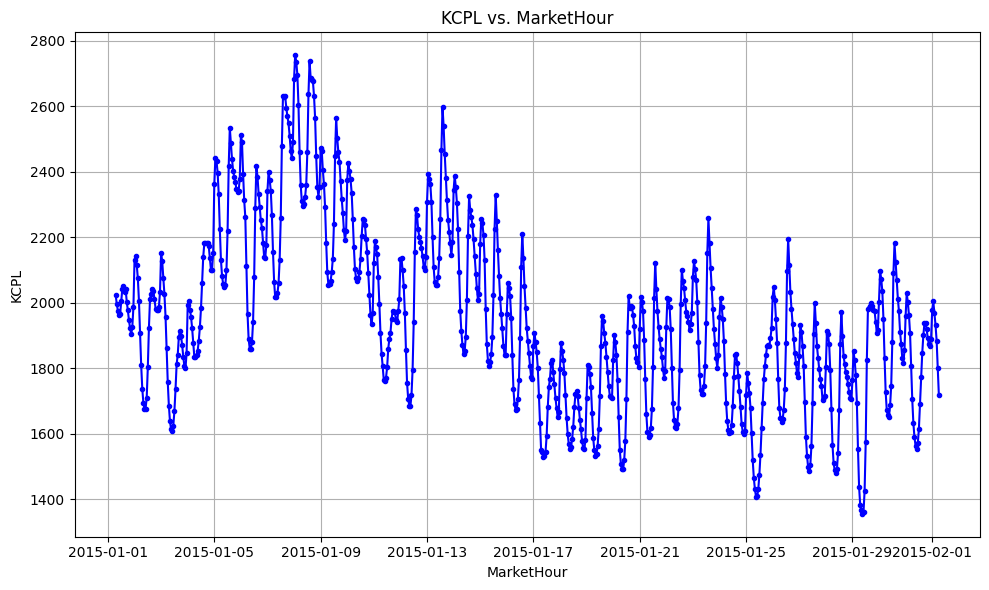

In [7]:
# Create a line plot
plt.figure(figsize=(10, 6))
plt.plot(data['MarketHour'], data['KCPL'], marker='.', linestyle='-', color='b')
plt.title('KCPL vs. MarketHour')
plt.xlabel('MarketHour')
plt.ylabel('KCPL')
plt.grid(True)
plt.tight_layout()

plt.show()

In [8]:
geolocator = Nominatim(user_agent='city_coordinates')
city_name = 'Kansas City'
location = geolocator.geocode(city_name)

if location:
    latitude = location.latitude
    longitude = location.longitude
    print(f"Coordinates for {city_name}: Latitude {latitude}, Longitude {longitude}")
else:
    print(f"Coordinates for {city_name} not found.")

Coordinates for Kansas City: Latitude 39.100105, Longitude -94.5781416


In [9]:
start_date = data['MarketHour'].iloc[0].strftime('%Y-%m-%d')
end_date = data['MarketHour'].iloc[-1].strftime('%Y-%m-%d')
print(f"Start date of current batch: {start_date}\nEnd date of current batch: {end_date}")

Start date of current batch: 2015-01-01
End date of current batch: 2015-02-01


In [10]:
# Setup the Open-Meteo API client with cache and retry on error
cache_session = requests_cache.CachedSession('.cache', expire_after = -1)
retry_session = retry(cache_session, retries = 5, backoff_factor = 0.2)
openmeteo = openmeteo_requests.Client(session = retry_session)

# Make sure all required weather variables are listed here
# The order of variables in hourly or daily is important to assign them correctly below
url = "https://archive-api.open-meteo.com/v1/archive"
params = {
	"latitude": latitude,
	"longitude": longitude,
	"start_date": start_date,
	"end_date": end_date,
	"hourly": ["temperature_2m", "weather_code"],
	"temperature_unit": "fahrenheit",
	"timezone": "auto"
}
responses = openmeteo.weather_api(url, params=params)

# Process first location. Add a for-loop for multiple locations or weather models
response = responses[0]

# Process hourly data. The order of variables needs to be the same as requested.
hourly = response.Hourly()
hourly_temperature_2m = hourly.Variables(0).ValuesAsNumpy()
hourly_weather_code = hourly.Variables(1).ValuesAsNumpy()

hourly_data = {"date": pd.date_range(
	start = pd.to_datetime(hourly.Time(), unit = "s"),
	end = pd.to_datetime(hourly.TimeEnd(), unit = "s"),
	freq = pd.Timedelta(seconds = hourly.Interval()),
	inclusive = "left"
)}
hourly_data["temperature_f"] = hourly_temperature_2m
hourly_data["weather_code"] = hourly_weather_code.astype(int)

hourly_dataframe = pd.DataFrame(data = hourly_data)
hourly_dataframe.head(20)

,date,temperature_f,weather_code
0,2015-01-01 06:00:00,20.382801,1
1,2015-01-01 07:00:00,18.942799,1
2,2015-01-01 08:00:00,19.032801,1
3,2015-01-01 09:00:00,19.122799,1
4,2015-01-01 10:00:00,19.212799,1
5,2015-01-01 11:00:00,19.482800,1
6,2015-01-01 12:00:00,19.482800,1
7,2015-01-01 13:00:00,19.662800,1
8,2015-01-01 14:00:00,19.932800,0
9,2015-01-01 15:00:00,22.002800,0


In [11]:
hourly_dataframe['weather_code'].value_counts()

weather_code
0     348
1     132
3     111
2      79
71     36
51     20
73     19
53     17
75      6
Name: count, dtype: int64

In [12]:
# Merge DataFrames on 'MarketHour' and 'date'
merged_df = pd.merge(data, hourly_dataframe, left_on='MarketHour', right_on='date', how='inner')

# Drop the duplicate 'date' column
merged_df.drop(columns=['date'], inplace=True)

# Now, 'merged_df' contains the merged data
merged_df.head(20)

,MarketHour,KCPL,DayOfWeek,Timestamp,temperature_f,weather_code
0,2015-01-01 07:00:00,2024.031667,Thursday,1420095600,18.942799,1
1,2015-01-01 08:00:00,1994.646167,Thursday,1420099200,19.032801,1
2,2015-01-01 09:00:00,1976.253083,Thursday,1420102800,19.122799,1
3,2015-01-01 10:00:00,1961.418333,Thursday,1420106400,19.212799,1
4,2015-01-01 11:00:00,1965.443250,Thursday,1420110000,19.482800,1
5,2015-01-01 12:00:00,2004.644250,Thursday,1420113600,19.482800,1
6,2015-01-01 13:00:00,2042.558000,Thursday,1420117200,19.662800,1
7,2015-01-01 14:00:00,2051.081500,Thursday,1420120800,19.932800,0
8,2015-01-01 15:00:00,2033.290250,Thursday,1420124400,22.002800,0
9,2015-01-01 16:00:00,2041.120417,Thursday,1420128000,25.332800,1


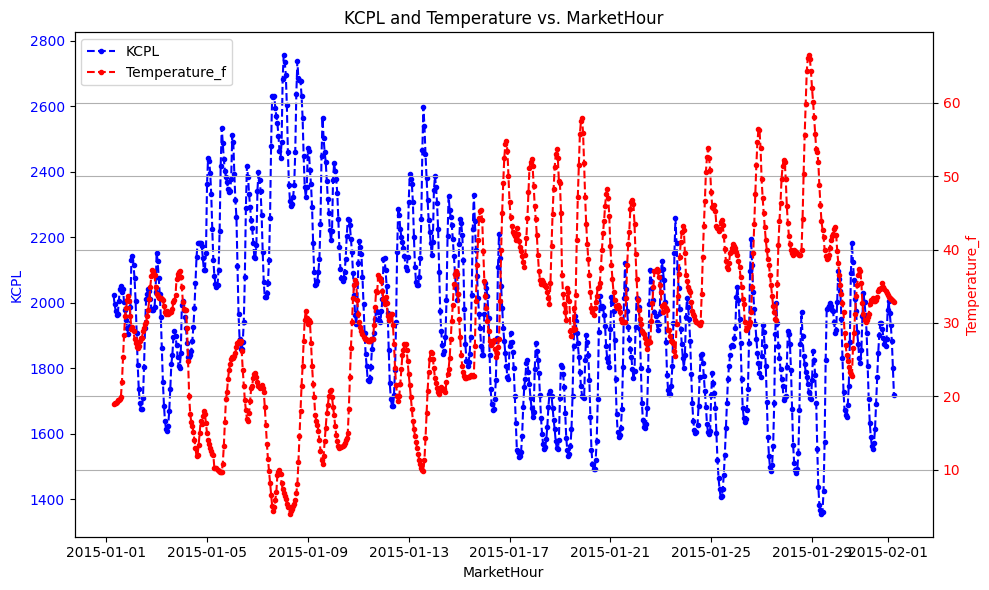

In [13]:
x = merged_df['MarketHour']
y_kcpl = merged_df['KCPL']
y_temperature = merged_df['temperature_f']

# Create a figure and axis
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot 'KCPL' data using the first y-axis (left)
ax1.plot(x, y_kcpl, marker='.', linestyle='--', color='b', label='KCPL')
ax1.set_xlabel('MarketHour')
ax1.set_ylabel('KCPL', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Create a second y-axis on the right for 'temperature_2m'
ax2 = ax1.twinx()
ax2.plot(x, y_temperature, marker='.', linestyle='--', color='r', label='Temperature_f')
ax2.set_ylabel('Temperature_f', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Add legends
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')

plt.xlabel('MarketHour')
plt.grid(True)
plt.xticks(rotation=45)

# Set a title
plt.title('KCPL and Temperature vs. MarketHour')

# Show the plot
plt.tight_layout()
plt.show()

In [14]:
batch_month = merged_df['MarketHour'].iloc[0].strftime('%Y-%m')
folder_name = 'dataset'
file_name = batch_month + '.csv'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)
file_path = os.path.join(folder_name, file_name)
merged_df.to_csv(file_path, index=False)
print(f"CSV file '{file_name}' saved in the 'dataset' folder.")

CSV file '2015-01.csv' saved in the 'dataset' folder.


In [15]:
# Convert 'MarketHour' column to datetime format
data['MarketHour'] = pd.to_datetime(data['MarketHour'], format='%Y-%m-%d %H:%M:%S')

# Extract various information
data['Year'] = data['MarketHour'].dt.year
data['Quarter'] = data['MarketHour'].dt.quarter  # Quarter of the year (1-4)
data['IsWeekend'] = (data['MarketHour'].dt.weekday < 5).astype(int)  # 1 if it's a weekend, 0 otherwise
data['Month'] = data['MarketHour'].dt.month
data['DayNumber_Year'] = data['MarketHour'].dt.day
data['DayNumber_Week'] = data['MarketHour'].dt.day_of_week  # Monday is 0, Sunday is 6
data['DayName'] = data['MarketHour'].dt.strftime('%A')  # Full weekday name
data['DayOfYear'] = data['MarketHour'].dt.day_of_year
data['Hour'] = data['MarketHour'].dt.hour
data['Minute'] = data['MarketHour'].dt.minute
data['WeekNumber'] = data['MarketHour'].dt.isocalendar().week  # Week number
#data['Second'] = data['MarketHour'].dt.second
#data['IsAM'] = data['MarketHour'].dt.strftime('%p') == 'AM'  # True if it's AM, False if PM
#data['IsMonthStart'] = data['MarketHour'].dt.is_month_start  # True if the day is the start of the month
#data['IsMonthEnd'] = data['MarketHour'].dt.is_month_end  

# Displaying the modified DataFrame
print(data.head(20))


            MarketHour         KCPL DayOfWeek   Timestamp  Year  Quarter  \
0  2015-01-01 07:00:00  2024.031667  Thursday  1420095600  2015        1   
1  2015-01-01 08:00:00  1994.646167  Thursday  1420099200  2015        1   
2  2015-01-01 09:00:00  1976.253083  Thursday  1420102800  2015        1   
3  2015-01-01 10:00:00  1961.418333  Thursday  1420106400  2015        1   
4  2015-01-01 11:00:00  1965.443250  Thursday  1420110000  2015        1   
5  2015-01-01 12:00:00  2004.644250  Thursday  1420113600  2015        1   
6  2015-01-01 13:00:00  2042.558000  Thursday  1420117200  2015        1   
7  2015-01-01 14:00:00  2051.081500  Thursday  1420120800  2015        1   
8  2015-01-01 15:00:00  2033.290250  Thursday  1420124400  2015        1   
9  2015-01-01 16:00:00  2041.120417  Thursday  1420128000  2015        1   
10 2015-01-01 17:00:00  2002.190167  Thursday  1420131600  2015        1   
11 2015-01-01 18:00:00  1976.567833  Thursday  1420135200  2015        1   
12 2015-01-0